In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#trajectory3: delta = .40
#trajectory1: delta = .05 
#trajectory2: delta= .05, tau=5
traj = np.load('trajs/trajectory_Ldist_tau500_phi01_eps01') # trajectory_Ldist_tau500_phi01_eps01
delta=5
tau=500
N=100
S = np.zeros(shape=(len(traj.index), N))
K = np.zeros(shape=(len(traj.index), N))
C = np.zeros(shape=(len(traj.index), N))
W = np.zeros(shape=(len(traj.index), N))
L = traj['P'][0]

for a, t in enumerate(traj.index):
    S[a,:] = traj['s'][t]
    C[a,:] = traj['C'][t]
    K[a,:] = traj['capital'][t]
    W[a,:] = traj['wage'][t]
        


In [ ]:
# animations
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.html'] = 'html5'
import matplotlib.colors as colors
import matplotlib.lines as mlines
plt.rc('font', size=15)  

n_agents = 100
start, stop = n_points+31500, 33500
fig, (ax,ax2) = plt.subplots(2,1,figsize=(9,9))
#ax.set_prop_cycle(color= [plt.cm.spectral(k) for k in np.linspace(0,1,n_agents)])
ax.set_xlim(( 0, 1))

ax2.set_xlim((0,1))
ax2.set_ylim((0,100))

n_points=2

dotted_line = mlines.Line2D([], [], color='k', ls='--', label=r'highest $C_i$')
kidot = mlines.Line2D([], [], color='k', ls='-', label=r'$\dot{K}_i=0$')

def animate(i):
    ax.clear()
    ax.set_ylabel(r'Capital $K_i$')
    ax.set_xlabel(r'Savings rate $s_i$')


    ax.set_xlim(( 0, 1))
    ax.set_ylim((K[start:stop,:n_agents].min(), K[start:stop,:n_agents].max() ))
    ax.legend(handles=[dotted_line,kidot],loc = 'upper center')
    for lnum in range(n_agents):
        ax.plot(S[i+start-n_points:i+start,lnum],K[i+start-n_points:i+start,lnum],
                    c=colors.rgb2hex(plt.cm.spectral((lnum+1.) / n_agents)[0:3]),
                ls='--',marker='o')
            #line.set_alpha([0.9,0.5])
    ax.plot(np.arange(0,1,0.01), ((np.max(C[i+start,:])/(1.- np.arange(0,1,0.01))) - \
                                  traj['wage'].values[i+start]/100.) /\
                      (traj['r'].values[i+start]), c='k',ls='--')

    ax.plot(np.arange(0,1,0.01), (traj['wage'].values[i+start]/N) / \
                      ( (delta/100.)/np.arange(0,1,0.01)  - traj['r'].values[i+start]),'k-')
              

    ax2.clear()   
    ax2.set_xlabel(r'Savings rate $s_i$')

    ax2.set_xlim(( 0, 1))
    ax2.set_ylim((0,n_agents))
    ax2.hist(S[i+start,:],bins=np.linspace(0,1,num=20))
    
lines=[]
for k in range(n_agents+2):
    lobj = ax.plot([],[],
                  color=plt.cm.spectral((k+1.) / n_agents) )[0]
    lines.append(lobj)
    
#x = S[start,:n_agents]
#line, = ax.plot(x, K[start,:n_agents])
#ax.set_yscale('log')



#ax.legend([r'$\dot{K}_i=0$'],loc = 'lower right')
ani = animation.FuncAnimation(fig, animate, np.arange(0, stop-start),
                              interval=50, blit=False)
#HTML(ani.to_html5_video())
#ani.save('Wippe_all_C.mp4')

In [15]:
a=[1,2,3]
a[2]
#a[1:2]

3

62


/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in divide


91
29


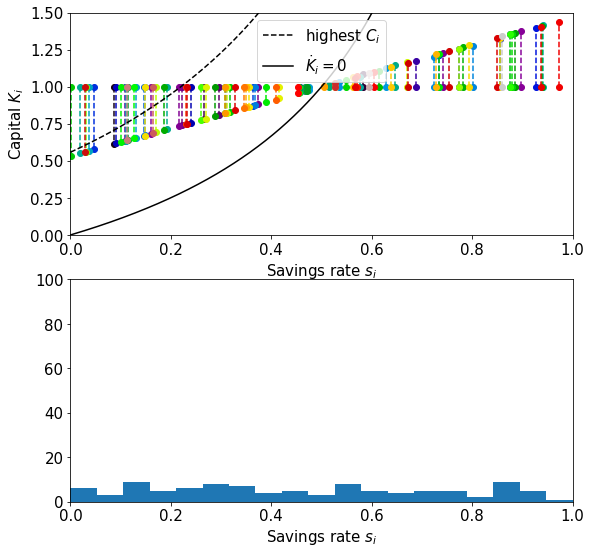

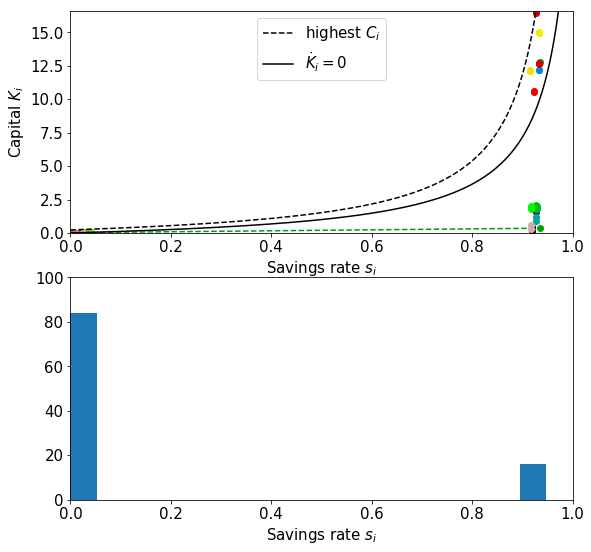

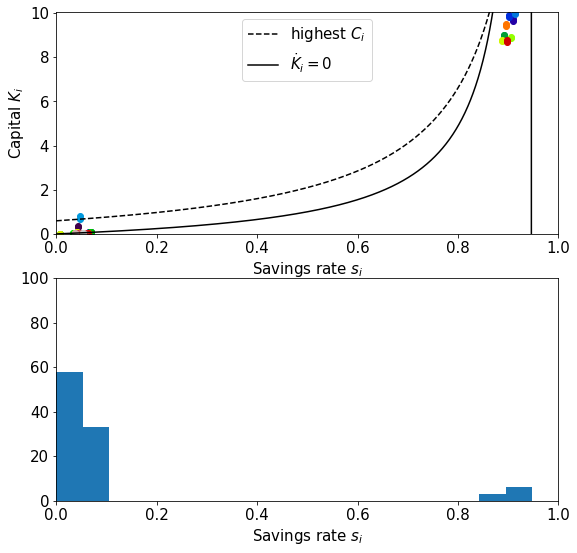

In [36]:
# Make some still images.
import matplotlib.lines as mlines
import matplotlib.colors as colors

plt.rc('font', size=15)  

n_agents = 100
n_points=2

start, stop = n_points, 4002

_=0
for i in np.arange(start,stop+1,(stop-start)/2):
    fig, (ax,ax2) = plt.subplots(2,1,figsize=(9,9))
    #ax.set_prop_cycle(color= [plt.cm.spectral(k) for k in np.linspace(0,1,n_agents)])
    ax.set_xlim(( 0, 1))

    ax.set_ylim((0, np.max([K[i-n_points:i,:n_agents].max(),1.5] )))

    dotted_line = mlines.Line2D([], [], color='k', ls='--', label=r'highest $C_i$')
    kidot = mlines.Line2D([], [], color='k', ls='-', label=r'$\dot{K}_i=0$')
    ax.set_ylabel(r'Capital $K_i$')
    ax.set_xlabel(r'Savings rate $s_i$')
    ax.set_xlim(( 0, 1))
    if _==5 :
        ax.legend(handles=[dotted_line,kidot],loc = 'upper right')
    else:
        ax.legend(handles=[dotted_line,kidot],loc = 'upper center')
        _+=1
    
    for lnum in range(n_agents):
        ax.plot(S[i-n_points:i,lnum],K[i-n_points:i,lnum],
                    c=colors.rgb2hex(plt.cm.spectral((lnum+1.) / n_agents)[0:3]),
                ls='--',marker='o')
            #line.set_alpha([0.9,0.5])
    ax.plot(np.arange(0,1,0.0001), ((np.max(C[i,:])/(1.- np.arange(0,1,0.0001))) - \
                                  traj['wage'].values[i] * L[np.argmax(C[i,:])]) /\
                      (traj['r'].values[i]), c='k',ls='--')
    print np.argmax(C[i,:])
    ax.plot(np.arange(0,1,0.001), (traj['wage'].values[i]/N) / \
                      ( (delta/100.)/np.arange(0,1,0.001)  - traj['r'].values[i]),'k-')
    ax2.clear()   
    ax2.set_xlabel(r'Savings rate $s_i$')
    ax2.set_xlim(( 0, 1))
    ax2.set_ylim((0,n_agents))
    ax2.hist(S[i,:],bins=np.linspace(0,1,num=20))
    fig.savefig('tau500_fully_eps01_phi01_%s.pdf'%i)